In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных

In [38]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [19]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Предобработка: удаление пропусков

In [5]:
data

price  year  condition  cylinders  odometer title_status transmission  \
0     43900  2016          4          6     43500        clean    automatic   
1     15490  2009          2          8     98131        clean    automatic   
2      2495  2002          2          8    201803        clean    automatic   
3      1300  2000          1          8    170305      rebuilt    automatic   
4     13865  2010          3          8    166062        clean    automatic   
...     ...   ...        ...        ...       ...          ...          ...   
7012  22500  2015          3          6     23500        clean    automatic   
7013   5975  2005          2          8         0        clean    automatic   
7014   9999  2006          3          8    161514        clean    automatic   
7015  10900  2011          2          8    164000        clean    automatic   
7016  18000  2010          2          8    104000        clean    automatic   

     drive       size        lat        long  weather  
0      4wd  full-size  36.471500  -82.483400     59.0  
1      4wd  full-size  40.468826  -74.281734     52.0  
2      4wd  full-size  42.477134  -82.949564     45.0  
3      4wd  full-size  40.764373  -82.349503     49.0  
4      4wd        NaN  49.210949 -123.114720      NaN  
...    ...        ...        ...         ...      ...  
7012   rwd  full-size  32.680700 -117.169800     59.0  
7013   rwd  full-size  38.213303  -85.785762     50.0  
7014   NaN  full-size  37.609783 -120.995406     59.0  
7015   4wd  full-size  43.140600  -93.385000     47.0  
7016   4wd  full-size  37.987200  -84.178900     50.0  

[7017 rows x 12 columns]

In [3]:
data.isna().sum()

price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

In [40]:
data[~data['weather'].isna()]

price  year  condition  cylinders  odometer title_status transmission  \
0     43900  2016          4          6     43500        clean    automatic   
1     15490  2009          2          8     98131        clean    automatic   
2      2495  2002          2          8    201803        clean    automatic   
3      1300  2000          1          8    170305      rebuilt    automatic   
5      6995  2003          3          8    167662        clean    automatic   
...     ...   ...        ...        ...       ...          ...          ...   
7012  22500  2015          3          6     23500        clean    automatic   
7013   5975  2005          2          8         0        clean    automatic   
7014   9999  2006          3          8    161514        clean    automatic   
7015  10900  2011          2          8    164000        clean    automatic   
7016  18000  2010          2          8    104000        clean    automatic   

     drive       size        lat        long  weather  
0      4wd  full-size  36.471500  -82.483400     59.0  
1      4wd  full-size  40.468826  -74.281734     52.0  
2      4wd  full-size  42.477134  -82.949564     45.0  
3      4wd  full-size  40.764373  -82.349503     49.0  
5      4wd  full-size  45.518031 -122.578752     50.0  
...    ...        ...        ...         ...      ...  
7012   rwd  full-size  32.680700 -117.169800     59.0  
7013   rwd  full-size  38.213303  -85.785762     50.0  
7014   NaN  full-size  37.609783 -120.995406     59.0  
7015   4wd  full-size  43.140600  -93.385000     47.0  
7016   4wd  full-size  37.987200  -84.178900     50.0  

[6837 rows x 12 columns]

In [4]:
data[~data['size'].isna()]

price  year  condition  cylinders  odometer title_status transmission  \
0     43900  2016          4          6     43500        clean    automatic   
1     15490  2009          2          8     98131        clean    automatic   
2      2495  2002          2          8    201803        clean    automatic   
3      1300  2000          1          8    170305      rebuilt    automatic   
5      6995  2003          3          8    167662        clean    automatic   
...     ...   ...        ...        ...       ...          ...          ...   
7012  22500  2015          3          6     23500        clean    automatic   
7013   5975  2005          2          8         0        clean    automatic   
7014   9999  2006          3          8    161514        clean    automatic   
7015  10900  2011          2          8    164000        clean    automatic   
7016  18000  2010          2          8    104000        clean    automatic   

     drive       size        lat        long  weather  
0      4wd  full-size  36.471500  -82.483400     59.0  
1      4wd  full-size  40.468826  -74.281734     52.0  
2      4wd  full-size  42.477134  -82.949564     45.0  
3      4wd  full-size  40.764373  -82.349503     49.0  
5      4wd  full-size  45.518031 -122.578752     50.0  
...    ...        ...        ...         ...      ...  
7012   rwd  full-size  32.680700 -117.169800     59.0  
7013   rwd  full-size  38.213303  -85.785762     50.0  
7014   NaN  full-size  37.609783 -120.995406     59.0  
7015   4wd  full-size  43.140600  -93.385000     47.0  
7016   4wd  full-size  37.987200  -84.178900     50.0  

[5453 rows x 12 columns]

In [7]:
y = data['price']
x = data.drop(columns='price')

In [8]:
x = x.dropna()

In [9]:
x.isna().sum()

year            0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
size            0
lat             0
long            0
weather         0
dtype: int64

In [10]:
y = y.iloc[x.index]

In [12]:
x.shape[0] == y.shape[0] # проверка длины переменных x и y

True

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

## Кодирование категориальных переменных

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [15]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
  one_hot_encoder = OneHotEncoder()
  X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
  X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

  columns = one_hot_encoder.get_feature_names(columns_to_change)
  
  X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
  X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

  X_train = X_train.reset_index().drop(['index'], axis = 1)
  X_test = X_test.reset_index().drop(['index'], axis = 1)
  y_train = y_train.reset_index().drop(['index'], axis = 1)

  X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
  X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
  
  X_train_new = X_train_new.drop(columns=columns_to_change)
  X_test_new = X_test_new.drop(columns=columns_to_change)

  return X_train_new, X_test_new

In [16]:
 X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Обучение модели 

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


# Предобработка: заполнение пропусков

In [20]:
y = data['price']
x = data.drop(columns='price')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [22]:
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

In [23]:
X_train['drive'].value_counts(True).head(1)

4wd    0.738406
Name: drive, dtype: float64

In [24]:
X_train['size'].value_counts(True).head(1)


full-size    0.841164
Name: size, dtype: float64

In [25]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [26]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


# Предсказание пропусков с помощью ML

In [28]:
x

year  condition  cylinders  odometer title_status transmission drive  \
0     2016          4          6     43500        clean    automatic   4wd   
1     2009          2          8     98131        clean    automatic   4wd   
2     2002          2          8    201803        clean    automatic   4wd   
3     2000          1          8    170305      rebuilt    automatic   4wd   
4     2010          3          8    166062        clean    automatic   4wd   
...    ...        ...        ...       ...          ...          ...   ...   
7012  2015          3          6     23500        clean    automatic   rwd   
7013  2005          2          8         0        clean    automatic   rwd   
7014  2006          3          8    161514        clean    automatic   NaN   
7015  2011          2          8    164000        clean    automatic   4wd   
7016  2010          2          8    104000        clean    automatic   4wd   

           size        lat        long  weather  
0     full-size  36.471500  -82.483400     59.0  
1     full-size  40.468826  -74.281734     52.0  
2     full-size  42.477134  -82.949564     45.0  
3     full-size  40.764373  -82.349503     49.0  
4           NaN  49.210949 -123.114720      NaN  
...         ...        ...         ...      ...  
7012  full-size  32.680700 -117.169800     59.0  
7013  full-size  38.213303  -85.785762     50.0  
7014  full-size  37.609783 -120.995406     59.0  
7015  full-size  43.140600  -93.385000     47.0  
7016  full-size  37.987200  -84.178900     50.0  

[7017 rows x 11 columns]

In [29]:
data = x.copy()
 
test_data = data[data['weather'].isnull()]
X_test = test_data.drop(['size','weather','drive'], axis=1)

data.dropna(inplace=True)
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)

In [38]:
X_test

year  condition  cylinders  odometer title_status transmission  \
4     2010          3          8    166062        clean    automatic   
18    2015          3          6     73300        clean    automatic   
21    2015          3          6     88500        clean    automatic   
53    2018          4          8     10500        clean    automatic   
116   2015          4          8     26903        clean    automatic   
...    ...        ...        ...       ...          ...          ...   
6865  2014          3          6     86250        clean    automatic   
6921  2018          4          6      1073        clean    automatic   
6937  2006          3          8    131000        clean    automatic   
6963  2012          4          8    157887        clean    automatic   
6973  2016          4          6     67000        clean    automatic   

            lat        long  
4     49.210949 -123.114720  
18    49.184885 -122.801111  
21    50.039078 -125.271885  
53    49.172179 -123.076057  
116   50.045346 -125.269028  
...         ...         ...  
6865  49.184885 -122.801111  
6921  49.204598 -123.139205  
6937  -2.508807 -105.886335  
6963  49.737705 -125.000103  
6973  49.217779 -122.642126  

[180 rows x 8 columns]

In [33]:
categorial_cols = ['cylinders', 'title_status', 'transmission']

In [35]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
model = LinearRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array([ 40.91435555,  40.7637233 ,  39.74866152,  41.2755305 ,
        40.31791932,  41.10796547,  41.15337846,  39.94866488,
        41.10796547,  40.7217165 ,  40.18904454,  91.62094167,
        41.12549856,  41.33052316,  39.66827354,  40.91435555,
        40.77287826,  40.84208674,  41.10796547,  41.02118034,
        40.31791932,  41.30309209,  40.77645269,  40.75842615,
        40.61605044,  40.79031628,  40.7701239 ,  39.78723017,
        41.27231621,  39.77492057,  40.7637233 ,  40.7701239 ,
        41.10796547,  39.68313064,  40.12277414,  39.7873657 ,
        41.07798631,  41.06812063,  40.7637233 ,  40.90194049,
        41.10796547,  70.85737739,  30.44339508,  40.76125291,
        39.77492057,  41.12549856,  39.74864816,  40.72219488,
        40.97162064,  40.7448585 ,  39.71065847,  39.78779447,
        39.77492057,  40.15945849,  41.12549856,  40.7902779 ,
        39.65555168,  41.10796547,  40.76125291,  40.15619215,
        40.79031628,  41.10796547,  40.7902779 ,  40.72

## Решение Задания 4.5


Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на тип модели, который нужен (классификация или регрессия) в зависимости от типа признака. 

In [41]:
test_data.index

Int64Index([   4,   18,   21,   53,  116,  162,  180,  191,  260,  261,
            ...
            6589, 6698, 6719, 6824, 6845, 6865, 6921, 6937, 6963, 6973],
           dtype='int64', length=180)

In [44]:
len(x)

7017

In [43]:
test_data.index[:len(x)]

Int64Index([   4,   18,   21,   53,  116,  162,  180,  191,  260,  261,
            ...
            6589, 6698, 6719, 6824, 6845, 6865, 6921, 6937, 6963, 6973],
           dtype='int64', length=180)

In [45]:
for i, ni in enumerate(test_data.index[:len(x)]):
             x['weather'].loc[ni] = y_pred[i]

/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_27190/3939650608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['weather'].loc[ni] = y_pred[i]


In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


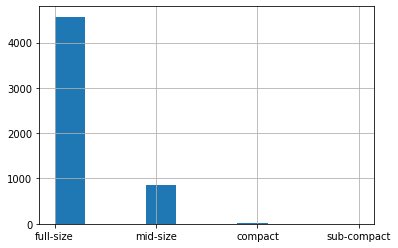

In [58]:
x['size'].hist()

Данный признак является категориальным. Следовательно, понадобится классификатор для заполения пропусков в нем.

In [48]:
data = x.copy()

test_data = data[data['size'].isnull()]
X_test = test_data.drop(['size', 'drive'], axis=1)

data.dropna(inplace=True)
y_train = data['size']
X_train = data.drop(['size', 'drive'], axis=1)

In [49]:
categorial_cols = ['cylinders', 'title_status', 'transmission']

In [50]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
model = LogisticRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [53]:
for i, ni in enumerate(test_data.index[:len(x)]):
             x['size'].loc[ni] = y_pred[i]

/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_27190/2553570009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['size'].loc[ni] = y_pred[i]


In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


# Пребодработка: работа с выбросами

In [55]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [56]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long','weather']]
data.dropna(inplace = True)

In [57]:
y = data['price']
x = data.drop(columns='price')
x.head()

year  cylinders  odometer        lat        long  weather
0  2016          6     43500  36.471500  -82.483400     59.0
1  2009          8     98131  40.468826  -74.281734     52.0
2  2002          8    201803  42.477134  -82.949564     45.0
3  2000          8    170305  40.764373  -82.349503     49.0
5  2003          8    167662  45.518031 -122.578752     50.0

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4682.957


In [60]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4306, 6) (4306,)
MAE: 4447.219


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [63]:
mask

array([ True,  True,  True, ...,  True, False,  True])

In [64]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3958, 6) (3958,)
MAE: 4421.844


In [65]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3918, 6) (3918,)
MAE: 4427.423
